veride genel egilimin oldukça dışına çıkan ya da diger gözlemlerden oldukça farklı olan gözlemlere 'aykırı gözlem' denir

aykırı degeri barındıran gözlem birimine ayrkırı gözlem

aykırılıgı ifade eden nümerik degere aykırı deger denir 

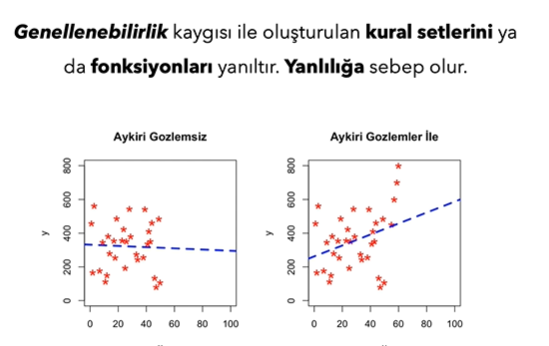

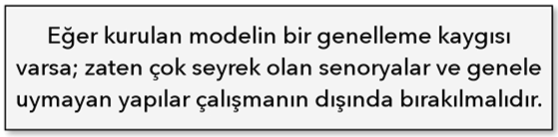

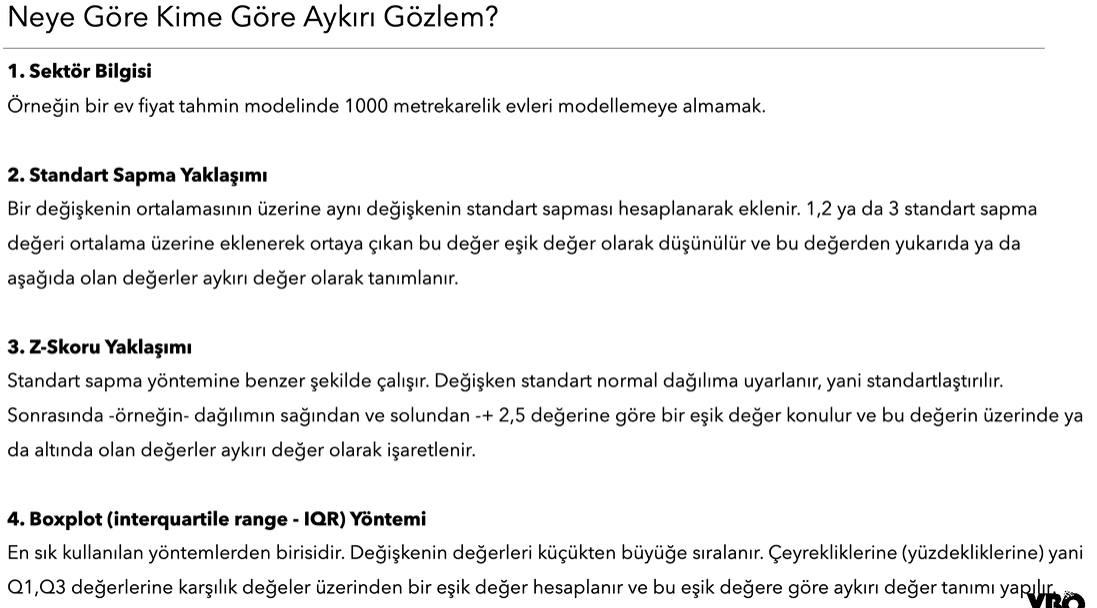

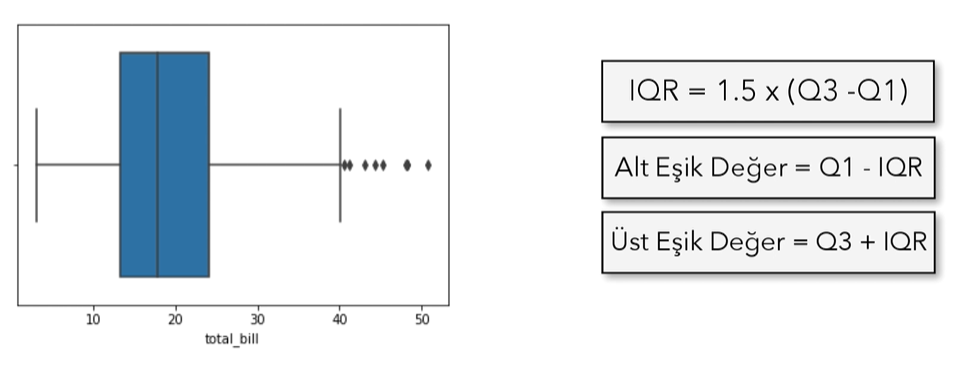

## AYKIRI DEGERLERİ YAKALAMAK

In [3]:
import seaborn as sns 
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()
#burada önce eksik gözlmleri sildik 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_table=df["table"]

In [5]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

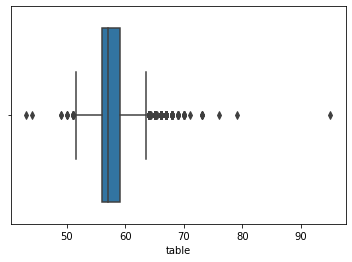

In [6]:
sns.boxplot(x=df_table);

In [7]:
#eşik deger sınır deger belirleyelim

In [9]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1#3.çeyrek degerden 1. çeyrek degeri çıkardık)

In [10]:
Q1

56.0

In [11]:
Q3

59.0

In [12]:
IQR

3.0

In [17]:
alt_sinir=Q1 - 1.5*IQR #alt sınırı 1.5 olarak belirle demek
ust_sinir=Q3 + 1.5*IQR #ÜST sınırı belirledik

In [18]:
alt_sinir

51.5

In [19]:
ust_sinir

63.5

In [20]:
#aykırı deger sorgulaması yapalım

In [26]:
(df_table < alt_sinir) | (df_table>ust_sinir)#ya alt sınır yada ust sınırdan aykırı olanları döndürdü

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [27]:
aykiri_tf=(df_table<alt_sinir)

In [28]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [30]:
df_table[aykiri_tf]#burada aykiri degerleri index degerleri ile yaklayabildik

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [32]:
df_table[aykiri_tf].index#sadece aykırı olanların indexlerini getirdik

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Problemi Çözmek

In [33]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

## Silme

In [34]:
import pandas as pd

In [35]:
type(df_table)

pandas.core.series.Series

In [36]:
df_table=pd.DataFrame(df_table)

In [37]:
df_table.shape

(53940, 1)

In [46]:
t_df=df_table[~((df_table<(alt_sinir)) | (df_table>(ust_sinir))).any(axis=1)]      

In [49]:
t_df.shape#yaklaşık 600 tane gözlem silindi ,çünkü bunlar aykırı idi

(53335, 1)

## Ortalama İle Doldurma 

In [50]:
import seaborn as sns 
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [51]:
df_table=df["table"]

In [52]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [53]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [54]:
df_table.mean()

57.45718390804603

In [57]:
df_table[aykiri_tf]=df_table.mean()#burada aykırı degerleri silmek istemezsek buraları ortalama deger ile doldurabiliriz

<ipython-input-57-5cbe99deb17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf]=df_table.mean()#burada aykırı degerleri silmek istemezsek buraları ortalama deger ile doldurabiliriz


In [56]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

## Baskılama

aykırılar yakalandıktan sonra alt taraftakiler alt sınıra üst tarafdaki degerler üst sınıra eşitlenir ,yani sınırlara dogru baskılama yapıp onları veri setinin içinde tutuyoruz 

In [59]:
import seaborn as sns 
df=sns.load_dataset('diamonds')
df=df.select_dtypes(include=['float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [60]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [62]:
df_table=df["table"]

In [63]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [64]:
alt_sinir

51.5

In [65]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64